## Illustrations of inverse problems and ill-posedness  


Author: OJM.

In [1]:
import numpy as np
from scipy import signal

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

### Differentiation and integration

In [ ]:
t = np.linspace(0,4*np.pi,10000)
x = np.sin(t)
plt.plot(t,x,'r--')
plt.show()

In [ ]:
#built-in 'integration'
plt.plot(t,np.cumsum(x),'r')
plt.show()

In [ ]:
plt.plot(t,2*np.cumsum(x)/np.max(np.cumsum(x))-np.max(x))
plt.plot(t,-np.cos(t),'k')
plt.show()

In [ ]:
#forward mapping for integration (cumulative sum)
def create_fmap_int(d=1):
    A = np.zeros([d,d])
    for i in range(0,d):
        A[i,:i+1] = 1
    return A

In [ ]:
#create forward mapping
A = create_fmap_int(len(x))
print(A)

In [ ]:
#calculate output of forward mapping
y = np.dot(A,x)

In [ ]:
#compare our forward mapping to built-in
plt.plot(t,np.cumsum(x),'r--')
plt.plot(t,y,'r')
plt.show()

In [ ]:
#invert noise-free case
plt.plot(t,np.dot(np.linalg.inv(A),y),'k')
plt.plot(t,x,'r--')
plt.show()

In [ ]:
#add almost undetectable noise
y_noisy = y+np.random.normal(0,0.5,size=len(y))
plt.plot(t,y_noisy,'k')
plt.plot(t,y,'r--')
plt.show()

In [ ]:
#invert noisy
plt.plot(t,x,'r--')
plt.plot(t,np.dot(np.linalg.inv(A),y_noisy),'k')
plt.show()

In [ ]:
#note: large condition number (ill-conditioned!)
np.linalg.cond(np.linalg.inv(A))

### Convolution and deconvolution (blurring and deblurring)

In [3]:
#forward mapping for convolution
def create_fmap_con(n=4,d=1):
    weights = np.zeros(d)
    weights[0:n] = 1./n
    A = np.zeros([d,d])
    for i in range(0,d):
        A[i,:] = np.roll(weights,i-int(n/2))
    return A

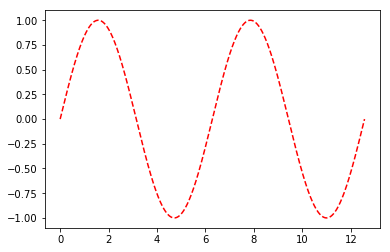

In [4]:
t = np.linspace(0,4*np.pi,1000)
x = np.sin(t)
plt.plot(t,x,'r--')
plt.show()

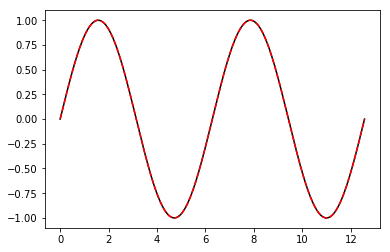

In [5]:
#create forward mapping for convolution
A = create_fmap_con(n=1,d=len(x))
y = np.dot(A,x)
plt.plot(t,x,'k')
plt.plot(t,y,'r--')
plt.show()

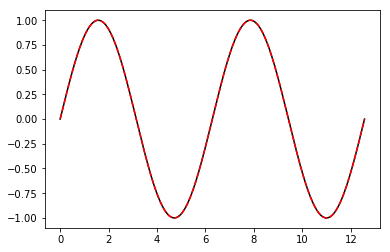

In [6]:
#invert noise-free case
plt.plot(t,np.dot(np.linalg.inv(A),y),'k')
plt.plot(t,x,'r--')
plt.show()

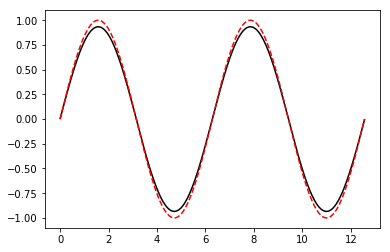

In [7]:
#create forward mapping for convolution with greater width of smoothing
A = create_fmap_con(n=int(len(x)/10+1),d=len(x))
y = np.dot(A,x)
plt.plot(t,y,'k')
plt.plot(t,x,'r--')
plt.show()

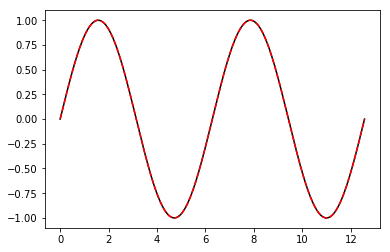

In [8]:
#invert noise-free
plt.plot(t,np.dot(np.linalg.inv(A),y),'k')
plt.plot(t,x,'r--')
plt.show()

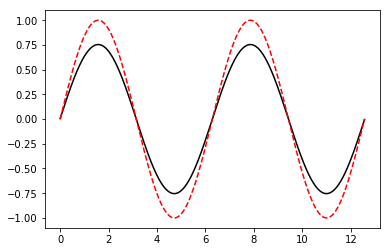

In [9]:
#create forward mapping for convolution with greater width of smoothing
A = create_fmap_con(n=int(len(x)/5+1),d=len(x))
y = np.dot(A,x)
plt.plot(t,y,'k')
plt.plot(t,x,'r--')
plt.show()

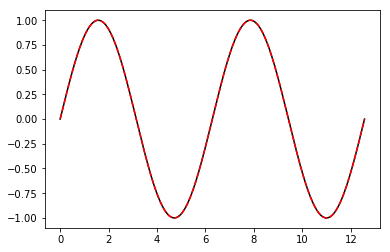

In [10]:
#invert noise-free
plt.plot(t,np.dot(np.linalg.inv(A),y),'k')
plt.plot(t,x,'r--')
plt.show()

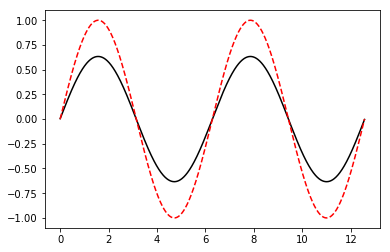

In [11]:
#create forward mapping for convolution with greater width of smoothing
A = create_fmap_con(n=int(len(x)/4+1),d=len(x))
y = np.dot(A,x)
plt.plot(t,y,'k')
plt.plot(t,x,'r--')
plt.show()

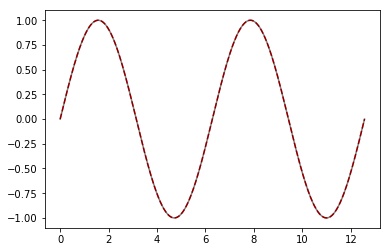

In [12]:
#invert noise-free
plt.plot(t,x,'r--')
plt.plot(t,np.dot(np.linalg.inv(A),y),'k',alpha=0.5)
plt.show()

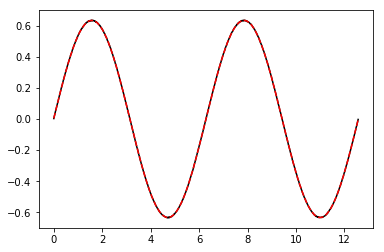

In [13]:
#add almost undetectable noise
y_noisy = y+np.random.normal(0,0.001,size=len(y))
plt.plot(t,y_noisy,'k')
plt.plot(t,y,'r--')
plt.show()

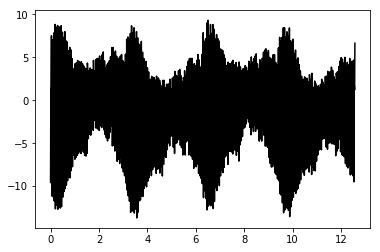

In [14]:
#invert noisy
plt.plot(t,x,'r--')
plt.plot(t,np.dot(np.linalg.inv(A),y_noisy),'k')
plt.show()

In [15]:
#note: large condition number (ill-conditioned!)
np.linalg.cond(np.linalg.inv(A))

56672.146780291674

In [16]:
#same as for A...
np.linalg.cond(A)

56672.146780212592

#### Extra: model resolution

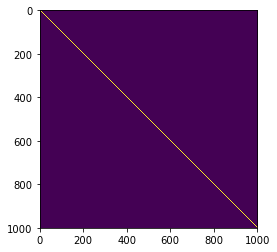

In [23]:
#Model resolution essentially identity
Apinv = np.linalg.pinv(A)
R_model = Apinv @ A
plt.imshow(R_model)
plt.show()

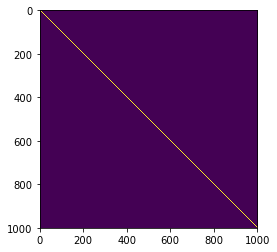

In [24]:
#Model resolution essentially identity
#Apinv = np.linalg.pinv(A)
R_data = A @ Apinv
plt.imshow(R_data)
plt.show()